# Implementing the Kalman Model

### Importing required libraries

In [34]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime
import datetime
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from math import sqrt


# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [16]:
!pip install pandas_datareader

In [19]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])

# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...,...
1253,2018-12-24,1396.030029,1307.000000,1346.000000,1343.959961,7220000,1343.959961
1254,2018-12-26,1473.160034,1363.010010,1368.890015,1470.900024,10411800,1470.900024
1255,2018-12-27,1469.000000,1390.310059,1454.199951,1461.640015,9722000,1461.640015
1256,2018-12-28,1513.469971,1449.000000,1473.349976,1478.020020,8829000,1478.020020


In [21]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [22]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,831.762583,814.173943,823.840056,823.256543,4.233329e+06,823.256543
std,482.851261,471.058235,477.931392,476.952699,2.400236e+06,476.952699
min,290.420013,284.000000,284.399994,286.950012,1.091200e+06,286.950012
25%,398.795006,388.427513,393.892494,394.772491,2.713950e+06,394.772491
50%,729.779999,720.079987,726.450012,727.190002,3.582300e+06,727.190002
75%,1009.742493,997.122513,1005.860016,1002.762497,4.859825e+06,1002.762497
max,2050.500000,2013.000000,2038.109985,2039.510010,2.385610e+07,2039.510010


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [25]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

In [26]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [9]:
# amzn = pd.read_csv("AMZN.csv")
# amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
# amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
# amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lrets
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,2.128472,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.805556,-12.445381
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.701389,-1.212175
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.673611,-4.362022
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.482639,-13.626532


C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


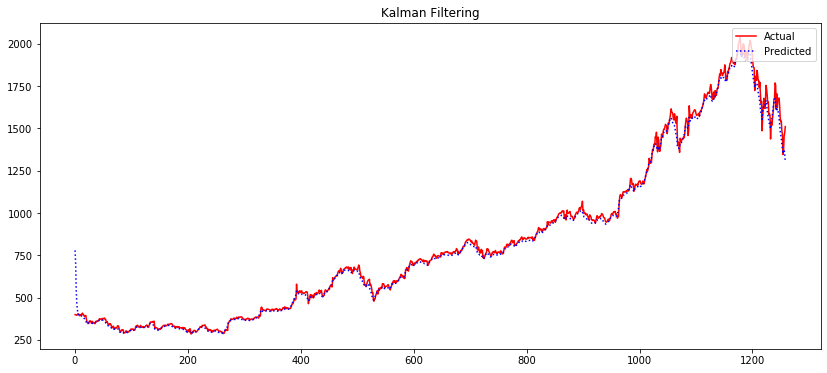

In [27]:
Y = amzn['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


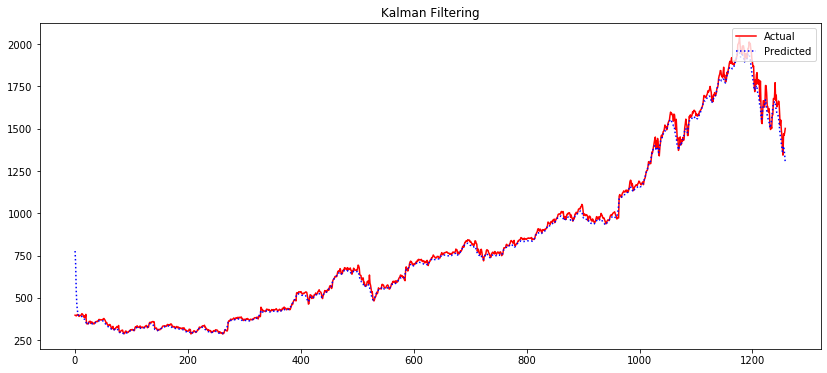

In [28]:
Y = amzn['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

In [29]:
results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  'Date':amzn['Date'],
                  'Open':amzn['Open'],
                  'Close':amzn['Close']
                       })


In [30]:
results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2014-01-02,397.970001,777.276970,398.799988,397.970001
2014-01-03,396.440002,700.499279,398.290009,396.440002
2014-01-06,393.630005,546.121895,395.850006,393.630005
2014-01-07,398.029999,467.370682,395.040009,398.029999
2014-01-08,401.920013,427.745356,398.470001,401.920013
2014-01-09,401.010010,407.208938,403.709991,401.010010
2014-01-10,397.660004,396.624085,402.529999,397.660004
2014-01-13,390.980011,391.668170,397.980011,390.980011
2014-01-14,397.540009,391.673994,392.130005,397.540009


In [35]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(u)})

# Long Short Day trading:
* if predicted > yesterdays close, buy and sell at end of day

* if predicted < yesterdays close, sell and buy at end of day

In [37]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))
        
        
        action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)
        
    else:
        action.append('Sell at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))
        
        
        action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
    print('\n')
        

0 Sell at Open 9970.0 - 25 50
0 Buy Back at Close 9999.25 0


1 Buy at Open 9957.25 25 88
1 Sell at Close 9999.0 0


2 Buy at Open 9896.25 25 158
2 Sell at Close 9998.75 0


3 Buy at Open 9876.0 25 48
3 Sell at Close 9998.75 0


4 Buy at Open 9961.75 25 352
4 Sell at Close 10400.0 0


5 Buy at Open 10092.75 25 374
5 Sell at Close 10399.25 0


6 Sell at Open 10063.25 - 25 60
6 Buy Back at Close 10001.5 0


7 Sell at Open 9949.5 - 25 226
7 Buy Back at Close 10000.5 0


8 Buy at Open 9803.25 25 62
8 Sell at Close 10000.5 0


9 Sell at Open 9973.5 - 25 103
9 Buy Back at Close 9999.75 0


10 Sell at Open 9842.0 - 25 104
10 Buy Back at Close 9999.0 0


11 Sell at Open 9856.5 - 25 8
11 Buy Back at Close 9998.25 0


12 Sell at Open 9672.0 - 24 229
12 Buy Back at Close 9998.2 0


13 Sell at Open 9792.0 - 24 289
13 Buy Back at Close 9997.96 0


14 Sell at Open 9624.0 - 24 1
14 Buy Back at Close 9597.88 0


15 Sell at Open 9555.84 - 24 295
15 Buy Back at Close 9597.4 0


16 Sell at Open 9372.0 - 

128 Buy Back at Close 5968.58 0


129 Buy at Open 5844.78 18 29
129 Sell at Close 5968.46 0


130 Buy at Open 5838.12 18 65
130 Sell at Close 5967.56 0


131 Buy at Open 5690.07 17 82
131 Sell at Close 5967.4 0


132 Buy at Open 5899.51 17 282
132 Sell at Close 6322.44 0


133 Sell at Open 6013.24 - 17 296
133 Buy Back at Close 6321.48 0


134 Sell at Open 6045.54 - 17 271
134 Buy Back at Close 6321.3 0


135 Sell at Open 6008.48 - 17 329
135 Buy Back at Close 6320.65 0


136 Sell at Open 6024.8 - 17 223
136 Buy Back at Close 6320.22 0


137 Sell at Open 6087.7 - 17 204
137 Buy Back at Close 6319.92 0


138 Sell at Open 6039.25 - 17 185
138 Buy Back at Close 6319.28 0


139 Sell at Open 6103.85 - 17 230
139 Buy Back at Close 6318.38 0


140 Sell at Open 6119.66 - 17 222
140 Buy Back at Close 6318.37 0


141 Sell at Open 6028.7 - 19 162
141 Buy Back at Close 6318.19 0


142 Sell at Open 6160.75 - 19 230
142 Buy Back at Close 6317.79 0


143 Sell at Open 6117.62 - 19 237
143 Buy Back at 

300 Buy Back at Close 6831.44 0


301 Sell at Open 6666.84 - 18 111
301 Buy Back at Close 6831.3 0


302 Sell at Open 6679.98 - 18 136
302 Buy Back at Close 6830.56 0


303 Sell at Open 6659.46 - 18 78
303 Buy Back at Close 6830.52 0


304 Sell at Open 6729.66 - 18 112
304 Buy Back at Close 6830.32 0


305 Sell at Open 6773.22 - 18 17
305 Buy Back at Close 6829.82 0


306 Sell at Open 6805.26 - 18 77
306 Buy Back at Close 6828.98 0


307 Sell at Open 6731.82 - 18 95
307 Buy Back at Close 6828.62 0


308 Sell at Open 6753.06 - 18 151
308 Buy Back at Close 6828.28 0


309 Sell at Open 6652.62 - 18 215
309 Buy Back at Close 6827.3 0


310 Sell at Open 6607.98 - 18 157
310 Buy Back at Close 6827.08 0


311 Sell at Open 6693.66 - 18 84
311 Buy Back at Close 6826.62 0


312 Sell at Open 6718.32 - 18 128
312 Buy Back at Close 6825.8 0


313 Sell at Open 6697.8 - 18 161
313 Buy Back at Close 6825.68 0


314 Sell at Open 6669.0 - 18 125
314 Buy Back at Close 6825.5 0


315 Buy at Open 6661.8 18

451 Sell at Close 4902.08 0


452 Sell at Open 4566.08 - 8 316
452 Buy Back at Close 4901.2 0


453 Sell at Open 4576.0 - 8 414
453 Buy Back at Close 4901.04 0


454 Buy at Open 4510.96 8 454
454 Sell at Close 4900.16 0


455 Buy at Open 4501.6 8 388
455 Sell at Close 4899.28 0


456 Buy at Open 4323.76 7 107
456 Sell at Close 4300.21 0


457 Buy at Open 4216.1 7 39
457 Sell at Close 4299.27 0


458 Buy at Open 4260.2 7 22
458 Sell at Close 4299.07 0


459 Buy at Open 4286.1 7 596
459 Sell at Close 4915.7 0


460 Buy at Open 4323.9 7 529
460 Sell at Close 4914.85 0


461 Sell at Open 4382.07 - 7 533
461 Buy Back at Close 4914.3 0


462 Buy at Open 4389.91 7 515
462 Sell at Close 4913.45 0


463 Buy at Open 4406.71 7 536
463 Sell at Close 4913.17 0


464 Buy at Open 4394.32 7 426
464 Sell at Close 4912.65 0


465 Buy at Open 4529.7 7 323
465 Sell at Close 4912.55 0


466 Sell at Open 4585.0 - 7 296
466 Buy Back at Close 4911.59 0


467 Sell at Open 4610.55 - 7 323
467 Buy Back at Close 

589 Sell at Open 4713.17 - 7 353
589 Buy Back at Close 4966.63 0


590 Buy at Open 4592.35 7 248
590 Sell at Close 4965.65 0


591 Buy at Open 4717.65 7 207
591 Sell at Close 4965.25 0


592 Buy at Open 4858.0 7 43
592 Sell at Close 4964.49 0


593 Sell at Open 4940.53 - 7 685
593 Buy Back at Close 5677.61 0


594 Sell at Open 5021.66 - 7 652
594 Buy Back at Close 5677.51 0


595 Sell at Open 5002.48 - 7 708
595 Buy Back at Close 5677.44 0


596 Sell at Open 4970.91 - 7 702
596 Buy Back at Close 5676.62 0


597 Sell at Open 4969.3 - 7 114
597 Buy Back at Close 4980.89 0


598 Sell at Open 4826.92 - 7 98
598 Buy Back at Close 4980.15 0


599 Sell at Open 4843.16 - 7 90
599 Buy Back at Close 4979.64 0


600 Sell at Open 4907.35 - 7 60
600 Buy Back at Close 4979.6 0


601 Sell at Open 4929.75 - 7 102
601 Buy Back at Close 4979.25 0


602 Buy at Open 4886.07 7 49
602 Sell at Close 4978.4 0


603 Sell at Open 4956.0 - 7 19
603 Buy Back at Close 4977.45 0


604 Sell at Open 4958.31 - 7 687
6

744 Sell at Open 3113.0 - 4 291
744 Buy Back at Close 3366.28 0


745 Sell at Open 3065.12 - 4 322
745 Buy Back at Close 3366.0 0


746 Sell at Open 3060.0 - 4 334
746 Buy Back at Close 3365.08 0


747 Sell at Open 3035.56 - 4 301
747 Buy Back at Close 3365.0 0


748 Sell at Open 3074.6 - 4 280
748 Buy Back at Close 3364.88 0


749 Sell at Open 3080.0 - 4 282
749 Buy Back at Close 3364.4 0


750 Sell at Open 3072.48 - 4 299
750 Buy Back at Close 3364.36 0


751 Sell at Open 3058.2 - 4 322
751 Buy Back at Close 3364.36 0


752 Sell at Open 3053.6 - 4 278
752 Buy Back at Close 3363.6 0


753 Sell at Open 3105.0 - 4 275
753 Buy Back at Close 3363.52 0


754 Sell at Open 3089.6 - 4 302
754 Buy Back at Close 3362.6 0


755 Sell at Open 3065.88 - 4 363
755 Buy Back at Close 3362.48 0


756 Buy at Open 3031.68 4 347
756 Sell at Close 3361.68 0


757 Buy at Open 3033.56 4 332
757 Sell at Close 3360.72 0


758 Buy at Open 3046.2 4 238
758 Sell at Close 3359.8 0


759 Buy at Open 3129.44 4 175
7

880 Buy Back at Close 1016.0 0


881 Sell at Open 972.79 - 1 62
881 Buy Back at Close 1015.66 0


882 Buy at Open 961.53 1 44
882 Sell at Close 1015.4 0


883 Sell at Open 964.66 - 1 50
883 Buy Back at Close 1015.14 0


884 Buy at Open 969.55 1 36
884 Sell at Close 1014.76 0


885 Buy at Open 985.0 1 18
885 Sell at Close 1014.47 0


886 Sell at Open 993.0 - 1 20
886 Buy Back at Close 1014.13 0


887 Sell at Open 1000.65 - 1 7
887 Buy Back at Close 1013.51 0


888 Sell at Open 1004.62 - 1 12
888 Buy Back at Close 1012.63 0


889 Sell at Open 1002.4 - 1 10
889 Buy Back at Close 1011.81 0


890 Buy at Open 1004.69 1 1
890 Sell at Close 1011.04 0


891 Sell at Open 1006.0 - 1 1011
891 Buy Back at Close 2035.45 0


892 Sell at Open 1025.0 - 1 1008
892 Buy Back at Close 2034.87 0


893 Sell at Open 1031.59 - 1 1006
893 Buy Back at Close 2034.7 0


894 Sell at Open 1021.28 - 1 1009
894 Buy Back at Close 2034.67 0


895 Sell at Open 1028.34 - 1 995
895 Buy Back at Close 2033.95 0


896 Sell at

1083 Sell at Open 1546.69 - 1 451
1083 Buy Back at Close 1968.86 0


1084 Sell at Open 1535.8 - 1 508
1084 Buy Back at Close 1968.09 0


1085 Buy at Open 1458.0 1 507
1085 Sell at Close 1967.17 0


1086 Buy at Open 1485.01 1 449
1086 Sell at Close 1966.96 0


1087 Buy at Open 1634.01 1 394
1087 Sell at Close 1966.62 0


1088 Sell at Open 1582.5 - 1 400
1088 Buy Back at Close 1966.13 0


1089 Sell at Open 1563.22 - 1 383
1089 Buy Back at Close 1965.26 0


1090 Sell at Open 1580.98 - 1 395
1090 Buy Back at Close 1964.68 0


1091 Sell at Open 1560.01 - 1 392
1091 Buy Back at Close 1964.08 0


1092 Sell at Open 1562.45 - 1 383
1092 Buy Back at Close 1963.95 0


1093 Sell at Open 1589.34 - 1 363
1093 Buy Back at Close 1963.14 0


1094 Sell at Open 1595.0 - 1 370
1094 Buy Back at Close 1962.39 0


1095 Sell at Open 1600.0 - 1 354
1095 Buy Back at Close 1962.0 0


1096 Sell at Open 1608.48 - 1 352
1096 Buy Back at Close 1961.08 0


1097 Sell at Open 1610.99 - 1 358
1097 Buy Back at Close 1960

1223 Sell at Open 3510.0 - 2 405
1223 Buy Back at Close 3914.82 0


1224 Sell at Open 3465.0 - 2 489
1224 Buy Back at Close 3913.86 0


1225 Sell at Open 3396.48 - 2 640
1225 Buy Back at Close 3913.7 0


1226 Sell at Open 3298.58 - 2 651
1226 Buy Back at Close 3913.34 0


1227 Sell at Open 3312.64 - 2 715
1227 Buy Back at Close 3913.02 0


1228 Sell at Open 3162.02 - 2 674
1228 Buy Back at Close 3912.88 0


1229 Sell at Open 3175.0 - 2 726
1229 Buy Back at Close 3912.82 0


1230 Sell at Open 3154.02 - 2 888
1230 Buy Back at Close 3912.58 0


1231 Buy at Open 2875.0 2 921
1231 Sell at Close 3911.92 0


1232 Buy at Open 3085.98 2 878
1232 Sell at Close 3911.46 0


1233 Buy at Open 3034.0 2 907
1233 Sell at Close 3911.12 0


1234 Buy at Open 3078.0 2 748
1234 Sell at Close 3910.66 0


1235 Buy at Open 3151.98 2 747
1235 Sell at Close 3909.84 0


1236 Buy at Open 3227.84 2 554
1236 Sell at Close 3909.5 0


1237 Sell at Open 3349.98 - 2 562
1237 Buy Back at Close 3909.14 0


1238 Sell at Op

In [38]:
results['Amount'] = list(Amount)

In [39]:
results['Returns'] = results['Amount'].pct_change()

In [40]:
results.head()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2014-01-02,397.970001,777.276970,398.799988,397.970001,9999.250031,NaN
2014-01-03,396.440002,700.499279,398.290009,396.440002,9999.000061,-2.499882e-05
2014-01-06,393.630005,546.121895,395.850006,393.630005,9998.750122,-2.499640e-05
2014-01-07,398.029999,467.370682,395.040009,398.029999,9998.749969,-1.526070e-08
2014-01-08,401.920013,427.745356,398.470001,401.920013,10400.000336,4.013005e-02


In [41]:
results.tail()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2018-12-24,1343.959961,1371.897424,1346.000000,1343.959961,3899.919922,-0.000251
2018-12-26,1470.900024,1396.458227,1368.890015,1470.900024,3899.800049,-0.000031
2018-12-27,1461.640015,1374.305671,1454.199951,1461.640015,3899.280029,-0.000133
2018-12-28,1478.020020,1346.054200,1473.349976,1478.020020,3899.040039,-0.000062
2018-12-31,1501.969971,1297.104541,1510.800049,1501.969971,3898.939941,-0.000026


#### Sharpe and is used to help investors understand the return of an investment compared to its risk. 1﻿﻿2﻿ The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

In [42]:
mean_returns = results['Returns'].mean()
sd = results['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(878)*(mean_returns)/sd
Sharpe_Ratio

0.001127517787779276 0.06723535950493167


0.49690449870956616

#### A good model should have an RMSE value less than 180.

#### RMSE Value of Amazon

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(results['Actual'], results['Predicted']))
rms

28.36511171691858